<a href="https://colab.research.google.com/github/laurencefrank/JADS_DS/blob/main/ReportDiscoverProjectLaurenceFrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes

## Attribution

This notebook presents a solution to the Pima Indians Diabetes prediction problem. It was written by Laurence Frank. The code has been reviewed and improved by Daniel Kapitan for educational purposes.

&copy; 2020 by [Laurence Frank](https://www.linkedin.com/in/laurencefrank/) and [Daniel Kapitan](https://www.linkedin.com/in/dkapitan). This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

![CC BY-SA 4.0](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)

## CRISP-DM Phase 1: Business Understanding
### Understanding Type-2 diabetes

A description of the data are available at [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database):

The following two articles give more background about this data set:

* Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. *In Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261--265). IEEE Computer Society Press.

* Schulz, L.O., Bennett, P.H., Ravussin, E., Kidd, J.R., Kidd, K.K., Esparza, J., Valencia, M.E. (2006). Effects of Traditional and Western Environments on Prevalence of Type 2 Diabetes in Pima Indians in Mexico and the U.S. *Diabetes Care 29*:1866–187


### Background

The article by Smith et al. (1988) explains more about the background of the data. The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. 

Eight variables were chosen to form the basis for forecasting the onset of diabetes within five years in Pima Indian women. Those variables were chosen because they have been found to be significant riskfactors for diabetes among Pimas or other populations.

*Objectives*

The goal of this analysis is:
* To explore how the eight variables are related to onset of diabetes within five years in this sample of Pima Indian women;
* To explore whether it is possible to predict the onset of diabetes with considerable precision.

*Business success criteria*
The project will be succesfull:
* when we will have more insight into how these eight risk factors are related to the onset of diabetes. 
* when we can achieve a sensitivity of 0.75 or higher in predicting diabetes.

## CRISP-DM Phase 2: Data Understanding

Data understanding comprises the following activities:

**Collect Initial Data**

In this project the data are already collected. The sample consists of 768 women Pima Indians.
The following variables are available in the data set:

1. Number of pregnancies
2. Glucose  
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. Skin thickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age: Age (years)
9. Outcome (binary 0, 1) for diabetes (1) and no diabetes (2)


### What do the variables in the data represent?

*Number of pregnancies* is clear. 

*Glucose* 
The variable `glucose` respresents plasma glucose concentration at 2 hours in an oral glucose tolerance test. Googling for reference values in persons without and with diabetes reveals https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296 and https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/: 

If you're being tested for type 2 diabetes, two hours after drinking the glucose solution:

* A normal blood glucose level is lower than 140 mg/dL (7.8 mmol/L).
* A blood glucose level between 140 and 199 mg/dL (7.8 and 11 mmol/L) is considered impaired glucose tolerance, or prediabetes. If you have prediabetes, you're at risk of eventually developing type 2 diabetes. You're also at risk of developing heart disease, even if you don't develop diabetes.
* A blood glucose level of 200 mg/dL (11.1 mmol/L) or higher may indicate diabetes.

*Blood pressure* 

Reference values for diastolic blood pressure are: 
For a normal reading, your blood pressure needs to show a top number (systolic pressure) that's between 90 and less than 120 and a bottom number (diastolic pressure) that's between 60 and less than 80.

*Skin thickness* 

[Googling](https://nutritionalassessment.mumc.nl/en/skinfold-measurements) reveals that triceps skin fold thickness is used to estimate the total percentage of body fat.
A skinfold caliper is used to assess the skinfold thickness, so that a prediction of the total amount of body fat can be made. This method is based on the hypothesis that the body fat is equally distributed over the body and that the thickness of the skinfold is a measure for subcutaneous fat.
Reference values are: For adults, the standard normal values for triceps skinfolds are: 2.5mm (men) or about 20% fat; 18.0mm (women) or about 30% fat.

*Insulin*. 

2 hours after glucose administration the reference values are: 16-166 mIU/L (111-1153 pmol/L)  Uh/ml

*BMI* 

Reference values are: 
* Below 18.5 = underweight range. 
* Between 18.5 and 24.9 = healthy weight range. 
* Between 25 and 29.9 = overweight range. 
* Between 30 and 39.9 = obese range.

*Diabetes pedigree function* 

The Diabetes Pedigree Function (DPF) was developed by Smith, et al. (1988) to provide a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject. The DPF uses information from parents, grandparents, siblings, aunts and uncles, and first cousins. It provides a measure of the expected genetic influence of affected and unaffected relatives on the subject’s eventual diabetes risk.
The value of the DPF increases as the number of relatives who developed DM increases, as the age at which those relaves developed DM decreases,and as the percentage of genes that they share with the subject increases. The value of the DPF decreases as the number of relatives who never developed DM increases, as their ages at their last examination increase, and as the percent of genes that they share with the subject increases.

**How are glucose and insulin related with each other in connection to Type-2 diabetes?**

[See this webpage](https://www.diabetes.org/diabetes-risk/prevention/high-blood-sugar):
If you have type 2 diabetes, your body does not use insulin properly. This is called insulin resistance. At first, the beta cells make extra insulin to make up for it. But, over time your pancreas can't make enough insulin to keep your blood sugar at normal levels. Type 2 diabetes develops most often in middle-aged and older adults but can appear in young people.


### How was the sample obtained? What is the data generating model?

The cases in the data set were selected as follows.

Diabetes was defined as a plasma glucose concentration greater then 200 mg/dl two hours following the ingestion of 75 gm of a carbohydrate solution. Cases were drawn from the pool of examinations which met the following criteria:
1. The subject was female.
2. The subject was >= 21 year of age at the time of the index examination. An index examination refers to the study that was chosen for use in this model. It does not necesarily correspond to the chronologically first examination for this subject.
3. Only one examination was selected per subject. That examination was one that revealed a nondiabetic GTT and met one of the following two criteria:
     - Diabetes was diagnosed within five years of the examination, OR
     - A GTT performed five or more years later failed to reveal diabetes melitus.
4. If diabetes occurred within one year of an examination, that examination was excluded from the study to remove from the forecasting model those cases that were potentialy easier to forecast. In 75% of the excluded examinations, DM was diagnosed within six months.

**In conlusion**, the outcome variable (diabetes yes or no) reflects the status of the subjects *at least five years later* than the predicting variables were measured. This means that the predicting variables reflect the situation of the subject before being eventually diagnosed with diabetes.

These data are from a select sample of Pima Indians, where only women from 21 years and older are included. It is known that this ethnic group has a very high incidence of Diabetes type 2. 

From a methodological perspective, the design of this study is far from optimal. First, there seem to be more measurements available for the subjects: subjects were measured several times, but only one occasion is included in the data set. From a statistical point of vue this means that relevant information is thrown away: how the values on the risk factors evolve over time, which allows for better prediction. 
Also, the subjects who were diagnosed with diabetes within one year of an examination were removed from the study because they were potentially easier to forecast. This information would have been helpfull. I guess the goal of this study is to be able to identify persons who are at risk for developping type-2 diabetes to be able to work on prevention. I understand that it is better to identify these persons 5 years before onset of the disease, but one year before is also usefull information. A longitudinal prospective study would give more information about how the values of the risk factors evolve over time and would allow for better prediction models. 

In fact, what we are asked to do with the data is to predict based on only one measurement occasion if a Pima-Indian woman will develop Diabetes Type-2 in five years time or more. But in the daily practice, more measurement values are available. I assume that the study design is not optimal and that it will be difficult to develop a good prediction model with these data.


### Prepare the python configuration

Load the packages and configure the plot environment. Uncomment the followig cell and run it when using Google Colab.

In [1]:
# # update Google Colab
# # we want to use sklearn >= 0.23 for visualizing pipelines
# !pip install -U scikit-learn shap imblearn

In [2]:
from copy import copy
from pathlib import Path
import sys
import tarfile
import warnings

import numpy as np
import scipy as sp
import importlib, pprint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import requests
from requests.compat import urljoin
import seaborn as sns
import sklearn
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    enet_path,
    Lasso,
    LassoCV,
    lasso_path,
    LogisticRegression,
    Ridge,
    RidgeCV,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    plot_confusion_matrix,
    precision_recall_curve,
    precision_score,
    plot_precision_recall_curve,
    r2_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    KFold,
    StratifiedShuffleSplit,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier

# statsmodels is a Python module that provides classes and functions
# for the estimation of many different statistical models, as well as
# for conducting statistical tests, and statistical data exploration.
import statsmodels.api as sm
import statsmodels.formula.api as smf

# To explain the results of machine learning algorithms
import shap


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# setting to visualize pipelines
# see https://towardsdatascience.com/are-you-using-pipeline-in-scikit-learn-ac4cd85cb27f
sklearn.set_config(display='diagram')

SEED = 88
np.random.seed(SEED)

## Importing the data

Import the data from the following url (raw csv format):

https://raw.githubusercontent.com/jads-nl/discover-projects/main/pima-indians-diabetes/diabetes.csv

With `pandas.read_csv` import the csv file and transform into a pandas data frame.

In [3]:
Pima_diabetes = pd.read_csv("https://raw.githubusercontent.com/jads-nl/discover-projects/main/pima-indians-diabetes/diabetes.csv")

## Checks on data quality

Show basic information about the imported data frame with `.info()`

In [4]:
Pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 9 columns (variables in the data) and 768 rows (observations). 
For each variable, it says 768. Does this mean that there are 768 valid values for each variable, and no missing values?

Inspect the first 5 rows of the data frame.

In [5]:
Pima_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Inspect whether the data has missing values

In [6]:
Pima_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Visualize missing value patterns:

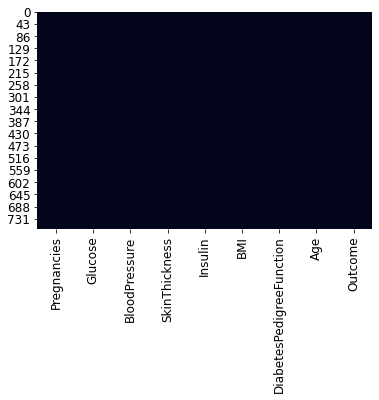

In [7]:
sns.heatmap(Pima_diabetes.isnull(), cbar=False);

A totally black rectangle: this means that all cells in the data set have values, but is not clear yet whether there are missing values present or not. Missing values can be coded as missing with a specific value (for example 999). From the first inspection of the data I notice that the first three observations have insuline values equal to zero. From the information I collected about the meaning of the variables in this data set, it is clear that insuline values equal to zere are unlikely to occur. So, this means that the zero's in this variable do not represent realistic values in real life and are probably a code for a missing value. 

Let's explore the variables in the data set to get an idea of the distribution of the values and to see whether there are more coded missing values. 

### Inspect the outcome variable

What is the number (and proportion) of Diabetes type 2 cases in this data set?

There are 768 Pima women in the data and 268 (35%) of these women were diagnosed with Diabetes Type-2. 



In [8]:
Pima_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# Percentage of diabetes Type-2 cases in the data
Pima_diabetes["Outcome"].value_counts()*100/len(Pima_diabetes)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Inspect the distribution of the predictor variables.

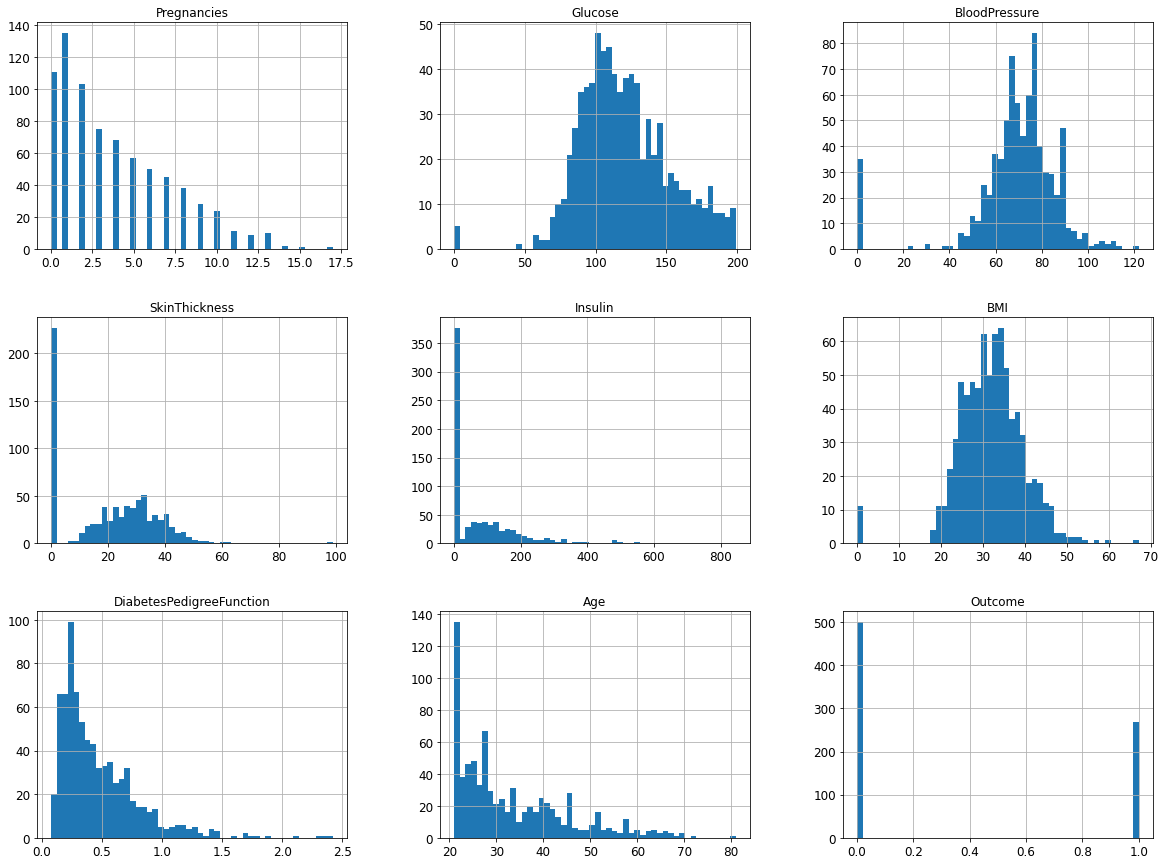

In [10]:
Pima_diabetes.hist(bins=50, figsize=(20,15));

In [11]:
Pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Conclusions from the descriptives of the data

`Age` follows a skewed distribution and shows that there are relatively more younger women than older women in the sample. Also note that there are no women younger than 21 years in this data set because of the way the sample was selected by the researchers. This means that the learning algoritm will only be able to generalize to a population of women with this age distribution.
 
The shape of the distribution of `BMI` is more or less normal with a few outliers with very high BMI values. The mean BMI is quite high with a value of 32, which corresponds to the category "obese". There are also subjects with BMI values equal to zero, which is not a realistic value and is therefore to be considered as a missing value coded as zero. 

The distribution of `Bloodpressure` shows that most subjects have a diastolic bloodpressure between 60 and 80, which is the healthy range, but there are a considerable number subjects with bloodpressure values that are too high. Also, for this variable there are values equal to zero, which might be codes for missing values. 

The distribution of `DiabetesPedigreeFunction` is skewed with most values falling in the lower ranger of the possible scores, which seems to indicate that most of the subjects in the sample have lower expected genetic influence of affected relatives. 

The distribution of `Glucose` shows that all subjects have glucose levels lower than 200 mg/dL, which is the threshold for being classified as diabetes patient (levels of Glucose equal to 200 mg/dL and higher). This result is to be expected because of the way the sample was constructed: only one examination was selected per subject and that examination was one that revealed a nondiabetic glucose tolerance test. The distrubution shows that the median value of glucose in the sample is equal to 117 mg/dL, which is lower than 140mg/dL and corresponds to a normal blood glucose level. The highest 25% of the glucose values in this sample are higher than 140 mg/dL, which corresponds to being at risk for developing type 2 diabetes.  

The distribution of `Insulin` shows that most values fall in the normal reference range of 6-166 mIU/L, but a considerable number of subjects have insulin values that are higher than the healthy reference range. There is a very high value of 846, which might be an error in the data, but there is no information available about this large value. Also, the variability of this variable is very high compared to the other variables in the data set, given the standard deviation equal to 115.

The distribution of `Pregnancies` shows a Poisson-like distribution with some high values of 14, 15 and 17 pregnancies. 

For `SkinThickness` the normal values for women are around 18.0mm which corresponds to 30% fat. The distribution in this sample shows that median is 23 mm, which is higher than the mean value of 18 mm. There are also outliers (or data errors?) around 60 and 99.

## CRISP-DM Phase 3: Prepare the data






### Dealing with outliers 

I will deal with the outliers before dividing the data set in training and a test set because these values might compromise the predictive properties of the model. For example when some of the outliers end up in the training set or in the test set, or in both. 

In general one should be careful when removing observations from the data set. Removing outliers has consequences for the underlying distribution of the data generating principle. Removing all extreme values from the data set results in underestimating the variances. But also that the model does not properly generalize to other data because it is based on a data set without extreme values, which can occur in reality. With emphasis on "occurring in reality". It goes without saying that extreme values that are the result of input errors (e.g. an age of 233 years for a human being) must of course be removed from the data. 

In detecting outliers we therefore limit ourselves to outliers in the multidimensional predictor space which can influence the slope of the regression lines. Given that the outcome is a binary (0, 1) variable, it is not possible to observe outliers on the outcome variable. 

In the histograms above we have seen that some variables have outliers. These are univariate outliers, which means that these values are extreme compared to the other values of the same variable. Also important is to check whether some participants have extreme values when the values on all variables are taken into account. These so called multivariate outliers can be detected using the Mahalanobis distance.  The Mahalanobis distance is particularily usefull to detect outliers in the predictor space because this distance measure also takes into account the correlation that the variables might have with each other. 

The formula to compute the Mahalanobis distance can be found on [Wikipedia](https://en.wikipedia.org/wiki/Mahalanobis_distance)  together with the following explanation:

> Mahalanobis distance and leverage are often used to detect outliers, especially in the development of linear regression models. A point that has a greater Mahalanobis distance from the rest of the sample population of points is said to have higher leverage since it has a greater influence on the slope or coefficients of the regression equation. Mahalanobis distance is also used to determine multivariate outliers. Regression techniques can be used to determine if a specific case within a sample population is an outlier via the combination of two or more variable scores. Even for normal distributions, a point can be a multivariate outlier even if it is not a univariate outlier for any variable, making Mahalanobis distance a more sensitive measure than checking dimensions individually.

The formula to compute the Mahalanobis distance is:

$$d^2 = (x - m)^{T} \bullet C^{-1} \bullet (x-m)$$,

where `x` represents the variables and `m` is the mean of the variables. 

$$C^{-1}$$ represents the inverse of the covariance matrix of the variables. 

In [12]:
def compute_mahalanobis_distance(df):
    """Computes Malahanobis distance for dataframe.
    
    Use Mahalanobis distance $d$ to detect outliers, with the formula
    
    $$d^2 = (x - m)^{T} \bullet C^{-1} \bullet (x-m)$$
    
    Arguments
    ---------
    df : pandas.DataFrame
         Dataframe containing features x in long format
    
    
    Returns
    -------
    numpy.ndarray: two-dimensional array
    
    
    """
    x_minus_mu = df - np.mean(df)
    C = np.cov(df.values.T)
    invC = sp.linalg.inv(C)
    x_minus_mu_dot_invC = np.dot(x_minus_mu, invC)
    return np.dot(x_minus_mu_dot_invC, x_minus_mu.T).diagonal()

In [13]:
# Prepare the data to compute the Mahalanobis distance for the explanatory
# variables (thus, without the outcome variable).
# Pima_diabetes["MahalDist"] = 
Pima_diabetes["MahalDist"] = compute_mahalanobis_distance(Pima_diabetes.drop("Outcome", axis=1))

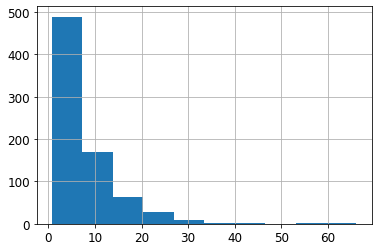

In [14]:
Pima_diabetes["MahalDist"].hist();

There are some observations with higher Mahalanobis distances. To detect outliers, you are looking for observations that are separated from the main cluster of the data. In this histogram you can see that the values larger than 50 are separated from the remaining observations. Let's inspect the values of the explanatory variables for these subjects with higher Mahalanobis distances. 

In [15]:
Pima_diabetes.query("MahalDist> 50")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MahalDist
13,1,189,60,23,846,30.1,0.398,59,1,66.130467
228,4,197,70,39,744,36.7,2.329,31,0,59.702052
445,0,180,78,63,14,59.4,2.420,25,1,54.040477
579,2,197,70,99,0,34.7,0.575,62,1,64.834739


These four subjects have extreme values on several explanatory variables. Subject 13 has a very high `Insuline` value of 846, combined with a high `Glucose` level. Subject 228 has als a high `Insulin` value combined with a `Glucose` value of 197, which is almost equal to the cut-off point of 200 for being diagnosed with diabetes Type-2. Subject number 445 has an extreme value for `BMI` equal to 59.4, combined with an extreme `SkinThickness` value of 63 and a high `Glucose` value of 180 and a high `DiabetesPedigreeFunction` combined with a relative young age (25 years). Subject 579 has an extreme value of 99 for `SkinThickness` combined with a high `Glucose` value. It is probable that some of these extreme values are data errors, but it is not possible to find out exactly what happened. Since these multivariate outliers might influence the fit of the model, these four subjects will be discarded from the analyses.


In [16]:
df_no_outliers = Pima_diabetes.query("MahalDist <= 50")
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    int64  
 1   Glucose                   764 non-null    int64  
 2   BloodPressure             764 non-null    int64  
 3   SkinThickness             764 non-null    int64  
 4   Insulin                   764 non-null    int64  
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  764 non-null    float64
 7   Age                       764 non-null    int64  
 8   Outcome                   764 non-null    int64  
 9   MahalDist                 764 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 65.7 KB


### Create training set and test set

A training set and a test set is created using the `StratifiedShuffleSplit` module from `sklearn.model_selection`. The stratified part is especially important to ensure that the training set and the test set contain approximately the same number of diabetes cases and non-diabetes cases. 

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in split.split(df_no_outliers, df_no_outliers["Outcome"]):
      PimaTrain = Pima_diabetes.loc[train_index]
      PimaTest = Pima_diabetes.loc[test_index]

The check below shows that the distribution of the outcome variable is the same in the training set and the test set.

In [18]:
print("The distribution of Outcome in the training set is:\n", PimaTrain["Outcome"].value_counts(normalize=True))
print("The distribution of Outcome in the test set is: \n", PimaTest["Outcome"].value_counts(normalize=True))

The distribution of Outcome in the training set is:
 0    0.649755
1    0.350245
Name: Outcome, dtype: float64
The distribution of Outcome in the test set is: 
 0    0.653595
1    0.346405
Name: Outcome, dtype: float64


### Descriptives of the training data set

Inspection of the distribution of the variables with descriptive statistics such as the mean, standard deviation and the quartiles, but also with histograms.

In [19]:
PimaTrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MahalDist
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,3.774141,120.425532,69.201309,19.867430,77.549918,32.001800,0.473432,33.299509,0.350245,7.949713
std,3.323249,32.280923,19.300566,15.898049,113.537466,7.630934,0.333276,11.920790,0.477438,7.060284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.785918
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.250000,0.242000,24.000000,0.000000,3.582841
50%,3.000000,116.000000,72.000000,22.000000,25.000000,32.000000,0.374000,29.000000,0.000000,5.623052
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.500000,0.626500,41.000000,1.000000,9.755857
max,17.000000,199.000000,122.000000,60.000000,846.000000,67.100000,2.329000,81.000000,1.000000,66.130467


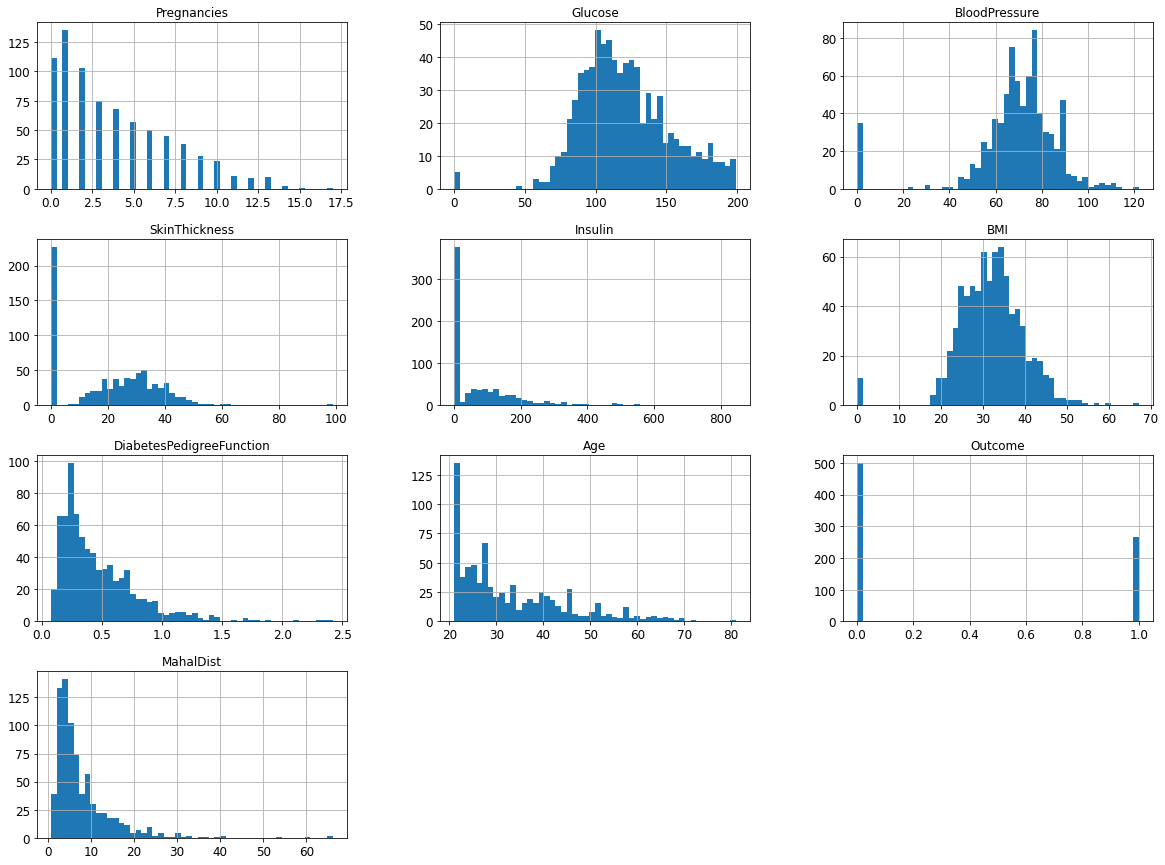

In [20]:
Pima_diabetes.hist(bins=50, figsize=(20,15));

### Dealing with missing values

For the moment the missing values that have been coded as zero will be replaced by the median value of the variable. There are much better ways to deal with missing values (for example multiple imputation). Also, more time should be spend to understand the pattern of missing values in this data set.

I will deal with the missing values in the training set only to avoid information from the test set to leak into the training data set. The median will be computed for the training set only. Furthermore, the median will computed for the two groups seperately: a median for the non-diabetes group and a median for the diabetes group.




**Dealing with the missing values coded as 0**

Assessing how many zero values there are for the variables.

In [21]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI']
cols_no_zeros = [col for col in PimaTrain.columns if col not in cols_with_zeros]
for col in cols_with_zeros:
    print(f"Total {col} values equal to zero: ", PimaTrain[PimaTrain[col] == 0].shape[0])

Total Glucose values equal to zero:  5
Total BloodPressure values equal to zero:  27
Total Insulin values equal to zero:  300
Total SkinThickness values equal to zero:  191
Total BMI values equal to zero:  6


### Conclusions on missing values sofar

It is clear that the variable `insulin` has the highest number of missing values. Probably this variable will not be useful in predicting Diabetes Type 2. The variable `skin thickness` also has a lot of missing values.

### Replace the zero values with the median for the training set and the test set

Since we aim to train and compare different models, we will us sklearn pipelines throughout.

In [22]:
PimaTrain.columns.difference(cols_with_zeros)

Index(['Age', 'DiabetesPedigreeFunction', 'MahalDist', 'Outcome',
       'Pregnancies'],
      dtype='object')

In [23]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI']
impute_zeros = make_column_transformer(
(SimpleImputer(
        missing_values=0,
        strategy='median'), cols_with_zeros), remainder='passthrough')
impute_zeros

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer',
                                 SimpleImputer(missing_values=0,
                                               strategy='median'),
                                 ['Glucose', 'BloodPressure', 'Insulin',
                                  'SkinThickness', 'BMI'])])

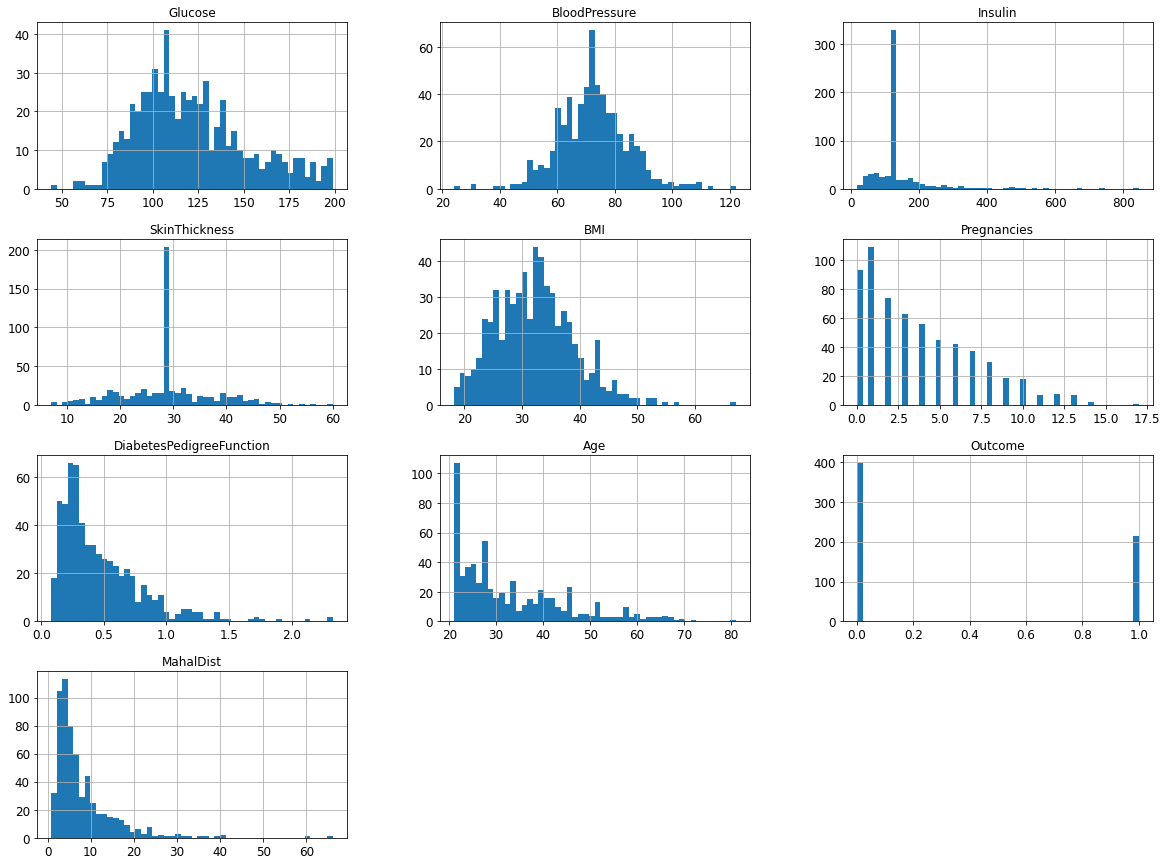

In [24]:
# note that column names are lost after transformation
# and that original order is not preserved
new_columns = cols_with_zeros + cols_no_zeros
pd.DataFrame(impute_zeros.fit_transform(PimaTrain), columns=new_columns).hist(bins=50, figsize=(20,15));

### Inspecting the distribution of the predictors after imputation

Conclusion:

The zero values have been replaced by the median.
But, of course, the distribution of some of the predictors are still very skewed, as discussed before. These deviant distributions are problematic when fitting linear models such as logistic regression. We will try several data transformations for positive skewness (see for an overview of possible data transformations, pp. 87-89 in: Tabachnick, B.C., Fidell, L.S. (2013). *Using Multivariate Statistics. Sixth Edition.* Boston: Pearson).

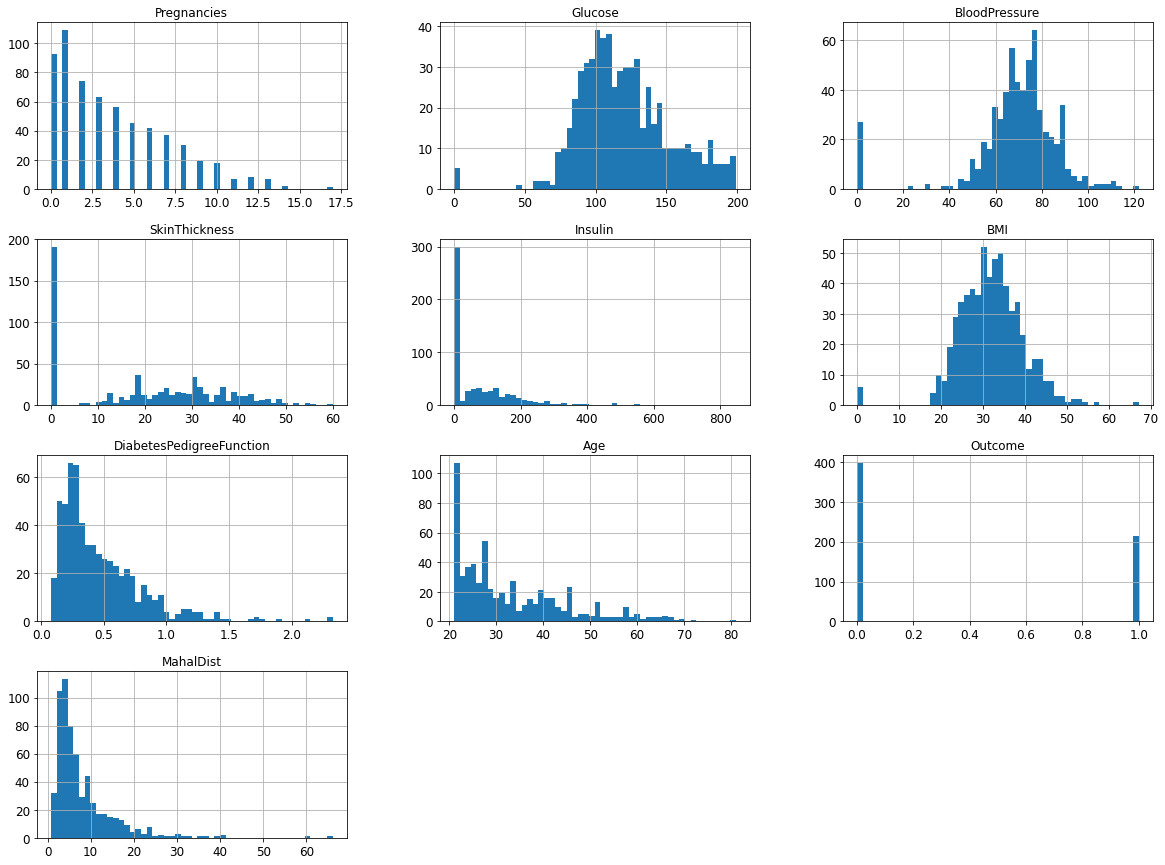

In [25]:
PimaTrain.hist(bins=50, figsize=(20,15));

### Explore correlations among the explanatory variables and the outcome



In [26]:
PimaTrain.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MahalDist
Pregnancies,1.000000,0.107424,0.117871,-0.101969,-0.078485,0.031420,-0.029042,0.535279,0.199755,0.107622
Glucose,0.107424,1.000000,0.142900,0.033456,0.347792,0.200497,0.115344,0.246234,0.460244,0.252196
BloodPressure,0.117871,0.142900,1.000000,0.173541,0.079353,0.232895,0.013557,0.221202,0.053712,-0.209292
SkinThickness,-0.101969,0.033456,0.173541,1.000000,0.474631,0.367907,0.180081,-0.129126,0.044571,-0.049138
Insulin,-0.078485,0.347792,0.079353,0.474631,1.000000,0.191816,0.216995,-0.031267,0.123549,0.248269
BMI,0.031420,0.200497,0.232895,0.367907,0.191816,1.000000,0.091063,0.037960,0.333338,0.094966
DiabetesPedigreeFunction,-0.029042,0.115344,0.013557,0.180081,0.216995,0.091063,1.000000,0.044180,0.149518,0.327932
Age,0.535279,0.246234,0.221202,-0.129126,-0.031267,0.037960,0.044180,1.000000,0.213408,0.322192
Outcome,0.199755,0.460244,0.053712,0.044571,0.123549,0.333338,0.149518,0.213408,1.000000,0.211848
MahalDist,0.107622,0.252196,-0.209292,-0.049138,0.248269,0.094966,0.327932,0.322192,0.211848,1.000000


In [27]:
PimaTrain.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.460244
BMI                         0.333338
Age                         0.213408
MahalDist                   0.211848
Pregnancies                 0.199755
DiabetesPedigreeFunction    0.149518
Insulin                     0.123549
BloodPressure               0.053712
SkinThickness               0.044571
Name: Outcome, dtype: float64

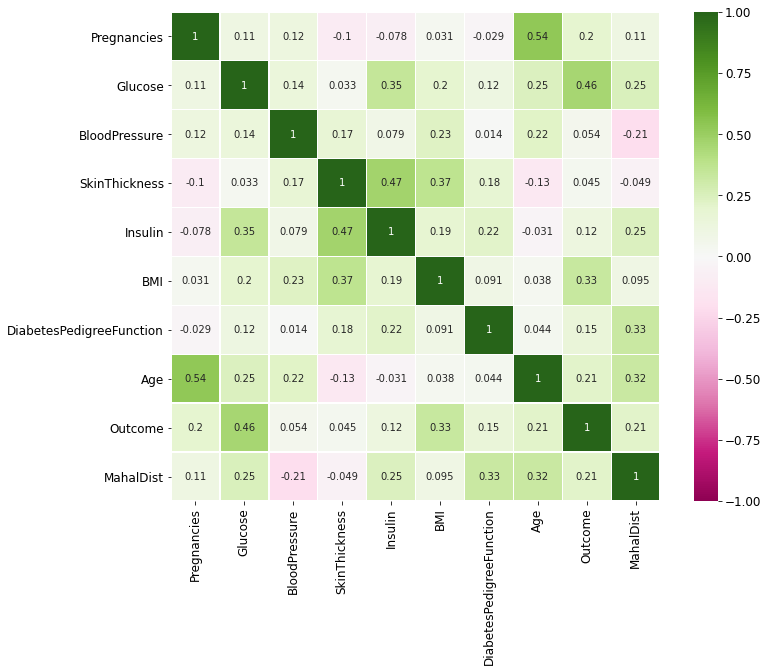

In [28]:
# Thanks to Jan Deknatel (https://github.com/knaat) for suggesting this configuration of the correlation matrix
# plot with white squares on the diagonal and shades of green for the positive
# correlations and shades of pink for the negative correlations.
heat_cmap = copy(mpl.cm.get_cmap("PiYG"))
heat_cmap.set_over("w")  # make the diagonal white
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    PimaTrain.corr(),
    vmin=-1,
    vmax=1,
    square=True,
    cmap=heat_cmap,
    annot=True,
    linewidths=0.5,
    robust=True,
);

**Conclusions correlation matrix**

The correlations between the explanatory variables and the outcome variable are moderate. The explanatory variable that has the highest correlation with `Outcome` is `Glucose` (corr = 0.49). The second highest correlation with `Outcome` is `BMI` (corr = 0.34).

The correlation measures the ***linear*** relation between two variables. Given the skewed distributions of for example `Insulin` and `Age`, it is not surprising that these variables show a moderate correlation with the outcome variable.

The explanatory variables are moderately correlated among themselves. The highest correlation between explanatory variables is for the pair `BMI` and `SkinThickness` with a correlation equal to 0.57. 

### Explore bivariate relations between the predictor variables

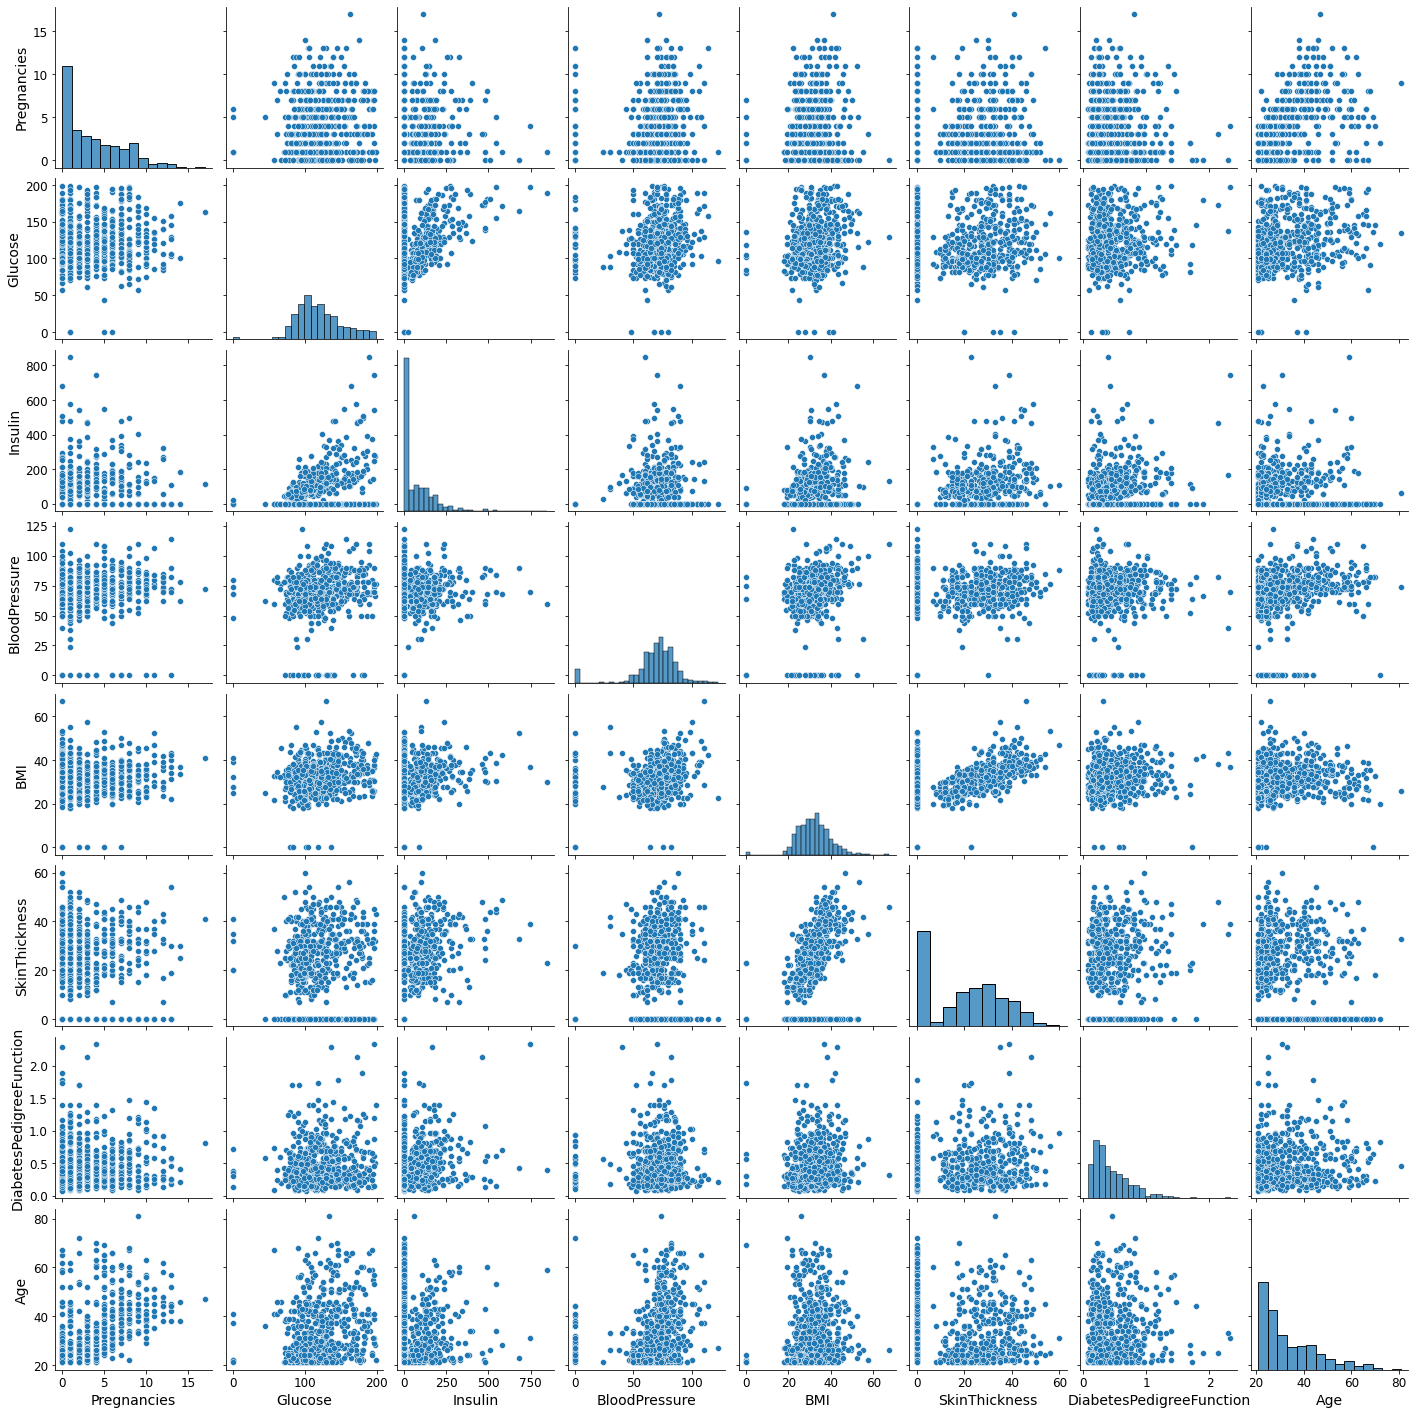

In [29]:
sns.pairplot(
    PimaTrain[
        [
            "Pregnancies",
            "Glucose",
            "Insulin",
            "BloodPressure",
            "BMI",
            "SkinThickness",
            "DiabetesPedigreeFunction",
            "Age",
        ]
    ],
    diag_kind="hist",
);

### Explore bivariate relations between the predictor variables with color coding for the outcome variable

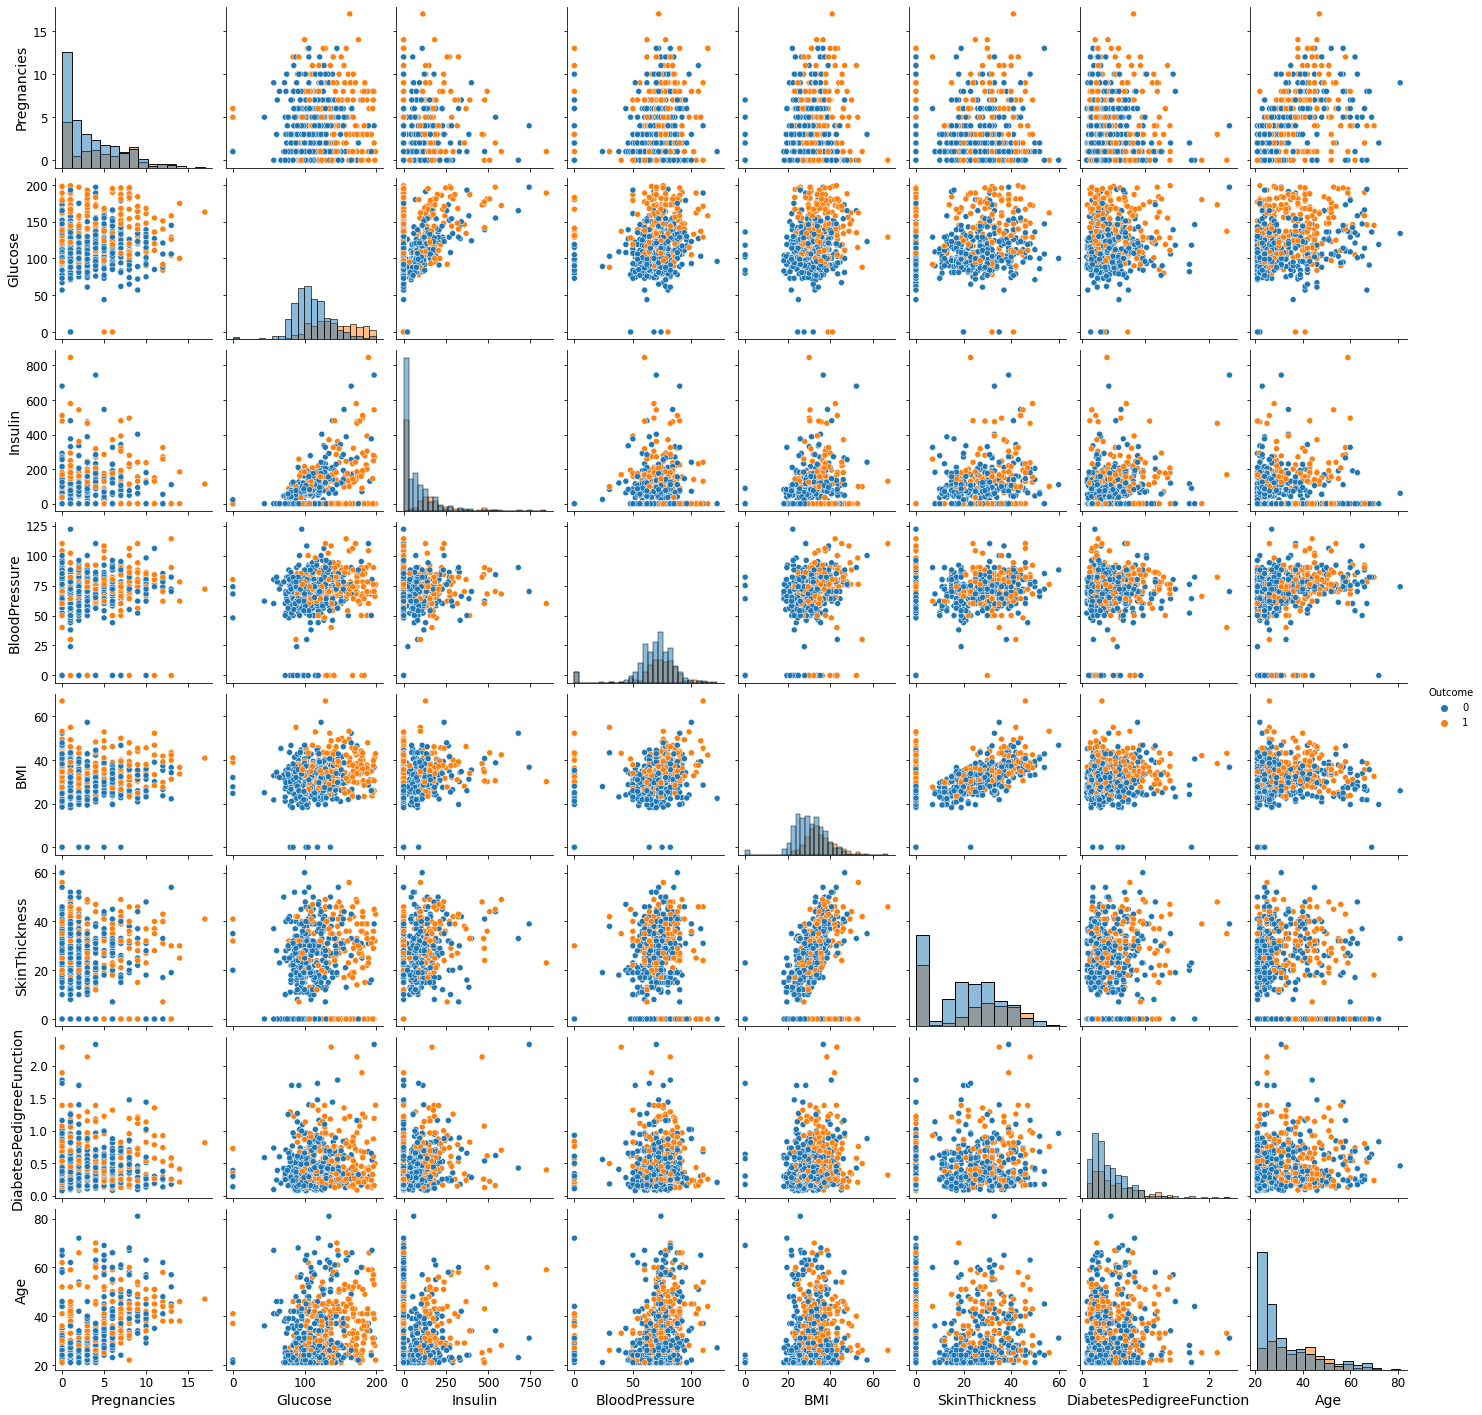

In [30]:
sns.pairplot(
    PimaTrain[
        [
            "Pregnancies",
            "Glucose",
            "Insulin",
            "BloodPressure",
            "BMI",
            "SkinThickness",
            "DiabetesPedigreeFunction",
            "Age",
            "Outcome",
        ]
    ],
    hue="Outcome",
    diag_kind="hist",
);

### Conclusions from the bivariate distributions

For most pairs of predictors there is no clear distinction between the diabetes group and the non-diabetes group. Only for the following pairs one can distinguish the shape of two clusters: 

* `Glucose` and `BMI`
* `Glucose` and `Age`
* `Glucose` and `DiabetesPedigreeFunction`
* and maybe `Glucose` and `Pregnancies`

### Explore distribution of explanatory variables for each group (diabetes type-2 versus healthy)

In [31]:
PimaTrain.columns.difference(['Outcome'])

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'MahalDist', 'Pregnancies', 'SkinThickness'],
      dtype='object')

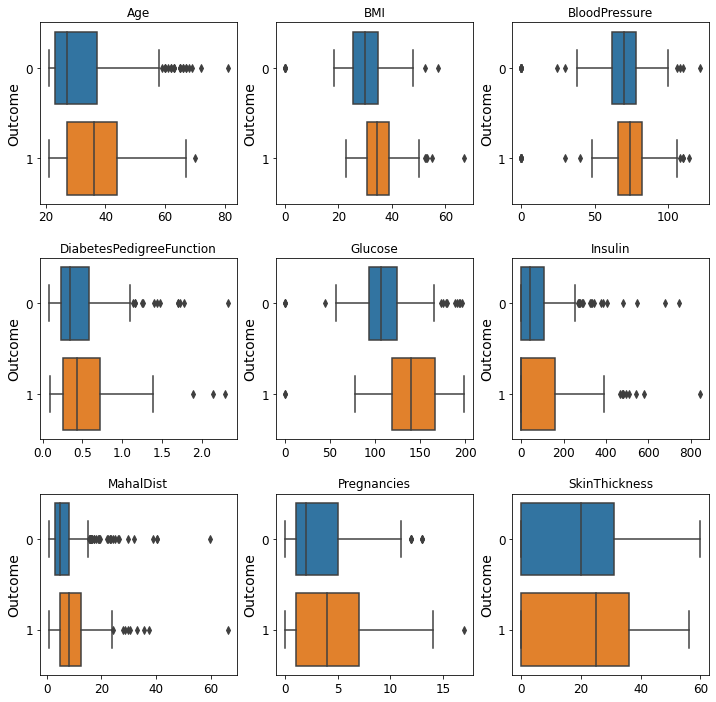

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 
fig, ax = plt.subplots(3, 3, figsize=(12,12), gridspec_kw={'hspace': 0.3})
for i, col in enumerate(PimaTrain.columns.difference(['Outcome'])):
    _ax=ax[i // 3, i % 3]
    sns.boxplot(x=col, y="Outcome", data=PimaTrain, orient='h', ax=_ax)
    _ax.set_title(col)
    _ax.set_xlabel(None)

From this we can see that for the diabetes group:
- Glucose levels are in general higher
- blood pressure values seem to be slightly higher
- BMI values are higher
- skin thickness values are higher
- higher values for the Diabetes Pedigree function.
- has a higher median age, but the healthy group has quite a number of outliers with high ages. 
- There are more pregnancies

### Separate the predictor variables from the outcome variable

Divide the data frame in a matrix (dataframe) `X` with the predictor variables and a vector `y` for the outcome variable.

In [33]:
y_train = PimaTrain["Outcome"]
X_train = PimaTrain.drop(["Outcome"], axis = 1)
cols_train = X_train.columns
index_train = X_train.index

y_test = PimaTest["Outcome"]
X_test = PimaTest.drop(["Outcome"], axis = 1)
cols_test = X_test.columns
index_test = X_test.index

### Scale the data

The variables that will be used as predictor variables (= all, except `Outcome`) will be scaled (standardized) because some machine learning algorithms (in particular K-Nearest Neighbors) are sensitive to the magnitude of the scale of the variables. In addition, the variable `Insulin` has a very high standard deviation.

Standardization is done separately for the training set and test set to avoid information leeking from the test set into the training set.

In [35]:
# same as before, but now with RobustScaler()
cols_no_imputation = [col for col in cols_no_zeros if col != 'Outcome']
impute_and_scale = make_pipeline(
    SimpleImputer(
        missing_values=0,
        strategy='median'), RobustScaler()
)

preproces = make_column_transformer((impute_and_scale, cols_with_zeros), (RobustScaler(), cols_no_imputation))

X_train_scaled = pd.DataFrame(preproces.fit_transform(X_train), columns = cols_train, index = index_train)
X_test_scaled = pd.DataFrame(preproces.fit_transform(X_test), columns = cols_test, index = index_test)

# Create a data frame with X_train_scaled and y_train together, which is necessary 
# to be able to use the module statsmodels
PimaTrain_scaled = pd.concat([y_train, X_train_scaled], axis=1)
PimaTest_scaled = pd.concat([y_test, X_test_scaled], axis=1)

## CRISP-DM Phase 4: Modeling


The following data analyses will be done:

**Logistic regression**

I will start with a logistic regression on the original, unscaled data, to provide a baseline model. Given the skewed distribution of some of the predictor variables, logistic regression models will be fitted with transformed predictor variables as well.  

**Lasso**

I'm also going to fit a Lasso, but I don't expect spectacular results because there are few predictors in the model and there is little to gain with variable selection. I don't expect the Lasso to perform any better than logistic regression. 

**KNN**

I will also try a simple K-Nearest Neighbor analysis, but I do not expect interesting results. 

**Naive Bayes classification**

Naive Bayes is a simple classifier that might give good results and will serve as a baseline model here.


**Random Forests and Gradient Boosting**

Given the skewed distributions of some predictor variables, I expect better results from machine learning algorithms that can model nonlinear relationships, such as Random Forests and Gradient Boosting. 


### Model evaluation
All models will be trained on a training set and the performance of the model will be evaluated on the test set using the following performance measures:

* A confusion matrix showing the True Positives, the True Negatives, the False Positives and False Negatives. 
* Accuracy: an overall measure of model performance based on both the true positives and the true negatives. 
* Sensitivity: the proportion of correctly predicted Diabetes Type-2 cases. 
* Specificity: the proportion of correctly predicted healthy cases.

Since data are imbalanced (the Diabetes cases represent only 35% of the total sample), it is quite possible that the majority class is better predicted by the machine learning algorithms than the minority class (the diabetes cases). Computing the sensitivity and the specificity will give more insight in how the machine learning algoritms perform for the Diabetes cases and for the healthy cases.

### Logistic regression

Logistic regression will be performed to test the association of all the predictor variables with the outcome variable. To obtain a clear overview of the model fit and the parameter estimates, the module `statsmodels` will be used. 

In [36]:
# To use the statsmodels module the logistic regression model is defined with 
# the tilde notation that is used in R for (generalized) linear models.
formula = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age'

In [37]:
logreg_model = smf.glm(formula=formula, data=PimaTrain, family=sm.families.Binomial())
logreg_result = logreg_model.fit()
print(logreg_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  611
Model:                            GLM   Df Residuals:                      602
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.86
Date:                Sat, 09 Jan 2021   Deviance:                       565.72
Time:                        17:19:09   Pearson chi2:                     641.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Results logistic regression analysis

The results of the logistic regression analysis in the table above show that the intercept has a large coefficient and a large associated z-value, compared to the other variables. This means that a lot of the variability in the data is not explained by the predictors. 

The following predictors show a statistically significant postive association with the diagnosis of diabetes at least five years later in descending order of magnitude of the regression coefficients and associated `z`-values:

* `Glucose`
* `BMI`
* `DiabetesPedigreeFunction`
* `Pregnancies`

These predictors all have positive associations with the presence of diabetes, meaning that higher values on these predictors are associated with diagnosis of diabetes type 2. 

The predictor `Insulin` has a negative coefficient which means that higher values of `Insulin` are associated with a lower probability of Diabetes Type 2. This makes sense because persons with Diabetes Type 2 have problems in making enough insulin to deal with the glucose levels in the blood. 

The predictor `SkinThickness` does not seem to contribute to the prediction of Diabetes Type 2. This lack of association might be due to the problematic distribution of `SkinThickness`: the distribution is skewed and it has a very high peak at the value 23, which is due to imputing the median value (= 23) for all zero values. We also have seen that `SkinThickness` is positively associated with `BMI`. 

**Influential observations and large residuals**
The plot below shows the leverage values against the normalized residuals of the logistic regression model. There are some observations with relatively high leverage values (observations with index equal to 124 and 380), which means that they might have an influence on the regression slope. Looking at the values of these subjects (see below for the output) reveals that subject with index = 124 has a very high weight give the BMI value equal to 55 and skin thickness equal to 42 mm. Subject with index 380 has an insulin value higher than 166 wich corresponds to a "at risk" level for diabetes type 2. Given these values, one would expect that these subjects would have been diagnosed with diabetes type 2, but this is not the case. 

Two observations have high residuals, which means that they are not well predicted by the model: the observations with index=740 and 6. Subject with index = 6 has high values for BMI and skin thickness, but low glucose and insulin values. This low (healthy) glucose value combined with high body weight and the diagnosis of diabetes type 2, might be the reason for this observation to have a high residual. For subject with index = 740 we see that this person has unhealthy values for BMI, skin thickness, glucose and insulin, but has not been diagnosed with diabetes type 2. 

It is clear why these observations have high leverage or residual values. For the moment I decide to keep these observations in the training model. 

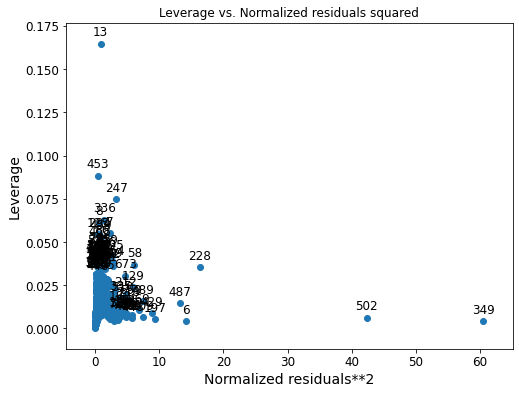

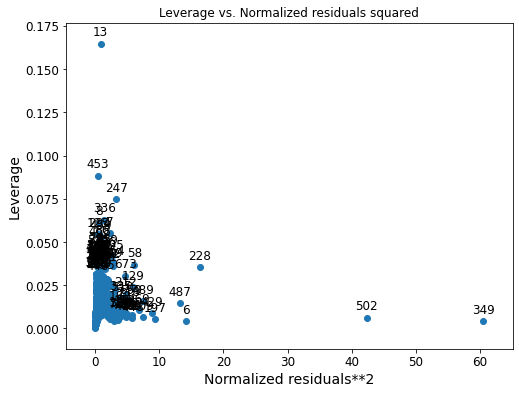

In [40]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8,6))
plot_leverage_resid2(logreg_result, ax = ax)

In [46]:
# evaluate outliers from leverage plot
PimaTrain.loc[[13, 349, 502],:].transpose().round(2)

,13,349,502
Pregnancies,1.00,5.00,6.00
Glucose,189.00,0.00,0.00
BloodPressure,60.00,80.00,68.00
SkinThickness,23.00,32.00,41.00
Insulin,846.00,0.00,0.00
BMI,30.10,41.00,39.00
DiabetesPedigreeFunction,0.40,0.35,0.73
Age,59.00,37.00,41.00
Outcome,1.00,1.00,1.00
MahalDist,66.13,20.85,23.05


 Confusion matrix and classification metrics

From the ouput of the logistic regression model, we know wich predictors are significantly associated with the diagnosis of diabetes type 2 five or more years later. But, how relevant are these results and how does the model perform in terms of predicting the diagnosis of diabetes type 2? 

The confusion matrix shows how relevant the model is in terms of classifying the observations in the correct class. 


In [47]:
yhat_logreg = logreg_result.predict(X_test) 
prediction_logreg = list(map(round, yhat_logreg)) 
cm_logreg = confusion_matrix(y_test, prediction_logreg)
print ("Confusion matrix : \n", cm_logreg)  

Confusion matrix : 
 [[83 17]
 [19 34]]


In [48]:
print(classification_report(y_test, prediction_logreg))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.64      0.65        53

    accuracy                           0.76       153
   macro avg       0.74      0.74      0.74       153
weighted avg       0.76      0.76      0.76       153



### Accuracy, Sensitivity and Specificity

Since `scikit` does not have specificity as metric, I make a customized function to calculate the specificity from the output of the `confusion_matrix` module. With the True Negatives, True Positives, False Negatives and True Positives, I calculate the accuracy, sensitivity and specificity. 

The results below show that the logistic regression model has a sensitivity equal to 0.55, which means that the model does a poor job in correctly predicting the Diabetes cases in the test set. For the non-diabetes cases, the model does a much better job with a specificity equal to 0.86. 


In [86]:
def compute_acc_sens_spec(output_confusion_matrix):
    """Computes the accuracy, sensitivity and specificity.
    
    Input is de output (object) of the module confusion_matrix."""
    TN, FP, FN, TP = output_confusion_matrix.ravel()
    Accuracy = round(((TP + TN) / (TP + TN + FN + FP)), 2)
    Sensitivity = round((TP / (TP + FN)), 2)
    Specificity = round((TN / (TN + FP)), 2)
    return Accuracy, Sensitivity, Specificity

In [52]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_logreg)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

Accuracy = 0.76
Sensitivity = 0.64
Specificity = 0.83


### Lasso

As expected, the lasso does not provide any new insights and the results largely correspond to the results of the logistic regression. The non-zero coefficients of the Lasso solution correspond to the statistically significant coefficients in the logistic regression model. The sensitivity of the Lasso model is the same as the logistic regression model (0.55).

In [55]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_scaled, y_train)
pred_lassocv = lassocv.predict(X_test_scaled)

Coefcv = pd.Series(np.abs(lassocv.coef_), index=X_train_scaled.columns).sort_values(ascending = False)
print(Coefcv)

Pregnancies                 0.257557
Insulin                     0.138475
BMI                         0.091263
DiabetesPedigreeFunction    0.035476
Age                         0.012729
BloodPressure               0.000423
Glucose                     0.000000
SkinThickness               0.000000
MahalDist                   0.000000
dtype: float64


In [65]:
pred_lasso_bin = [0 if x < 0.5 else 1 for x in pred_lassocv]
cm_lasso = confusion_matrix(y_test, pred_lasso_bin)
print(cm_lasso)

[[85 15]
 [23 30]]


In [57]:
print(classification_report(y_test, pred_lasso_bin))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.61        53

    accuracy                           0.75       153
   macro avg       0.73      0.71      0.71       153
weighted avg       0.75      0.75      0.75       153



In [59]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_lasso)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

Accuracy = 0.75
Sensitivity = 0.57
Specificity = 0.85


### K-nearest neighbors

The results of the K-nearest neighbors model do not show any improvement with a senstitivity equal to 0.53 and a specificity equalt to 0.77

In [61]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
pred_KNN = KNN_model.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [62]:
cm_KNN = confusion_matrix(y_test, pred_KNN)
print(cm_KNN)

[[86 14]
 [25 28]]


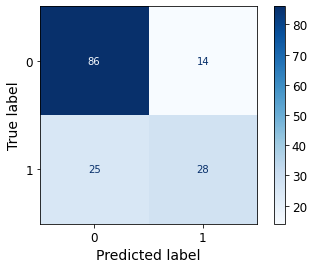

In [63]:
plot_confusion_matrix(KNN_model, X_test_scaled, y_test, cmap=plt.cm.Blues) 
plt.show()   

In [66]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.53      0.59        53

    accuracy                           0.75       153
   macro avg       0.72      0.69      0.70       153
weighted avg       0.74      0.75      0.74       153



In [67]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_KNN)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

Accuracy = 0.75
Sensitivity = 0.53
Specificity = 0.86


### Naive Bayes classifier



In [68]:
NB_model = GaussianNB()
pred_NB = NB_model.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [69]:
cm_NB = confusion_matrix(y_test, pred_NB)
print(cm_NB)

[[83 17]
 [21 32]]


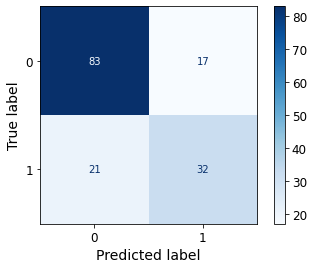

In [70]:
plot_confusion_matrix(NB_model, X_test_scaled, y_test, cmap=plt.cm.Blues) 
plt.show()   

In [71]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.65      0.60      0.63        53

    accuracy                           0.75       153
   macro avg       0.73      0.72      0.72       153
weighted avg       0.75      0.75      0.75       153



In [72]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_NB)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

Accuracy = 0.75
Sensitivity = 0.6
Specificity = 0.83


### Random Forest Classifier

The Random Forrest classifier shows some improvement in correctly predicting the diabetes cases in the test set with a sensitivity equal to 0.60. The non-cases are correctly predicted with a specificity value equal to 0.82.

In [73]:
RFmodel = RandomForestClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15) 
RFmodel_fit = RFmodel.fit(X_train_scaled, y_train)
prediction = RFmodel.predict(X_test_scaled)

In [77]:
cm_RF = confusion_matrix(y_test, prediction)

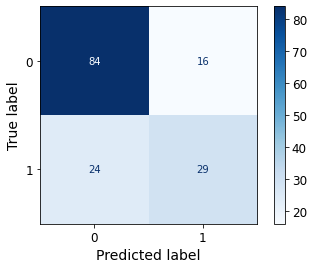

In [74]:
plot_confusion_matrix(RFmodel, X_test_scaled, y_test, cmap=plt.cm.Blues) 
plt.show() 

In [75]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.64      0.55      0.59        53

    accuracy                           0.74       153
   macro avg       0.71      0.69      0.70       153
weighted avg       0.73      0.74      0.73       153



In [78]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_RF)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

Accuracy = 0.74
Sensitivity = 0.55
Specificity = 0.84


### Gradient Boosting Classifier

The results of Gradient Boosting show that the sensitivity improves to a value of 0.70, but still not enough to be of any practical use. The specificity is 0.76, which is lower than the specificity attained by the random forrest classifier. 

Sofar Gradient Boosting provides the best results. With the use of the `Shap` module (see results below), we get insight in which variables play the most important role. The three most important variables are `Glucose`, `BMI` and `Age`. Higher values on these variables are related to a higher risk of being diagnosed with Diabetes-Type 2.

In [79]:
GBmodel = GradientBoostingClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15) 
GBmodel_fit = GBmodel.fit(X_train_scaled, y_train)
prediction = GBmodel_fit.predict(X_test_scaled)

In [80]:
cm_GB = confusion_matrix(y_test, prediction)
print(cm_GB)

[[78 22]
 [19 34]]


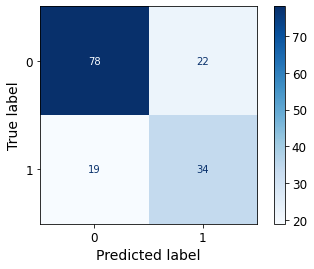

In [81]:
plot_confusion_matrix(GBmodel, X_test_scaled, y_test, cmap=plt.cm.Blues) 
plt.show() 

In [82]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.64      0.62        53

    accuracy                           0.73       153
   macro avg       0.71      0.71      0.71       153
weighted avg       0.74      0.73      0.73       153



In [83]:
Accuracy, Sensitivity, Specificity = compute_acc_sens_spec(cm_GB)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)


Accuracy = 0.73
Sensitivity = 0.64
Specificity = 0.78


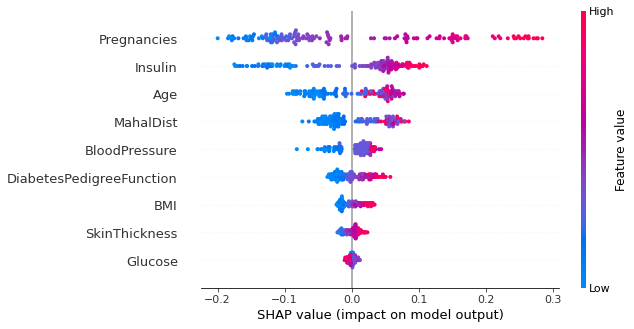

In [85]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(RFmodel)

# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values[1], X_test_scaled)

## Summary of the results

The results of the models in terms of *accuracy* and *precision* will be summarized in a data frame. To obtain this overview we construct a loop to fit all the models at once. To evaluate the models, a data frame is constructed with the values for Accuracy, Senstitivity and Specificity for each model.

In [87]:
# prepare empty lists for the metrics. These lists will be the columns in a dataframe presenting the results.
Accuracy = []
Sensitivity = []
Specificity = []

# prepare a list of machine learning models.
models = [LogisticRegression(random_state = SEED), KNeighborsClassifier(), GaussianNB(), LogisticRegression(penalty="l1", solver='liblinear',tol=1e-6, max_iter=int(1e6), warm_start=False), RandomForestClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED), GradientBoostingClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED)]

# prepare a list with the names of the machine learning models for the dataframe with the results
classifiers = ['Logistic Regression', 'KNN', 'Naive Bayes','Lasso', 'Random Forest', 'Gradient Boosting']

In [90]:
# A for loop to fit all the models defined in the previous step and to present the results in a dataframe.

for i in models:
    model = i
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    CM = confusion_matrix(y_test, prediction)
    result = compute_acc_sens_spec(CM)
    Accuracy.append(result[0])
    Sensitivity.append(result[1])
    Specificity.append(result[2])

# new code suggested by Jan Deknatel (https://github.com/knaat): much better, thanks!!
dataframe = pd.DataFrame(
{'Accuracy': Accuracy,
'Sensitivity': Sensitivity,
'Specificity': Specificity}, 
index=classifiers)

dataframe

,Accuracy,Sensitivity,Specificity
Logistic Regression,0.74,0.57,0.83
KNN,0.75,0.53,0.87
Naive Bayes,0.75,0.60,0.83
Lasso,0.75,0.58,0.83
Random Forest,0.74,0.55,0.84
Gradient Boosting,0.73,0.64,0.78


## Interpretation of the results

The overview of the results of the different machine learning models shows that none of the models achieves good results. Especially the sensitivity, the ability to predict the Diabetes Type-2 correctly, is lower than the other performance measures for all models. All models achieve better results in correctly predicting the healthy cases, compared to the Diabetes Type-2 cases (the minority class). Logistic regression, KNN and the Lasso all have sensitivity values equal to 0.57, which is quite low. The best result in terms of sensitivity was achieved by Gradient Boosting, with a sensitivity value of 0.70. 

### Comment from Daniel

- Given that you haven't used gridsearch and cross-validation yet, I think the results are pretty OK
- What I like is that you have taken a more statistical approach, carefully looking at the descriptive statistics
- To compare have a look at https://www.openml.org/t/37 for best performing models
  - Accuracy: 0.775

## CRISP-DM Phase 5: Evaluation

In general the results so far are not very good. The models fitted do not achieve satisfying results in predicting the Diabetes Type-2 cases. The following strategies might improve the prediction properties of the models. 

**Transformation of predictor variables**

The distributions of some of the predictors are very skewed. Maybe categorizing the predictors in a clever way might improve the prediction properties of the models. For example the predictor `Insulin` has a very deviant distribution and could be transformed in a binary (0,1) variable for healthy versus unhealthy insulin values. Howver, in general, categorizing continuous variables is not a good idea,see for example this reference: 
https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-21

> Categorization of continuously distributed exposure variables is associated with three problems: first, it involves multiple hypothesis testing with pairwise comparisons of quantiles; second, it requires an unrealistic step-function of risk that assumes homogeneity of risk within groups, leading to both a loss of power and inaccurate estimation; and third, it leads to difficulty comparing results across studies due to the data-driven cut points used to define categories.

**SMOTE sampling**

Since the models appear to have more difficulty predicting the minority class (the diabetes type-2 cases), SMOTE sampling could be helpful. 

**Model tuning, grid search**

Perhaps better results can be achieved with better model tuning and grid search. 


## Back to Modeling Phase 4: Transform some predictor variables

The following predictors have skewed distributions and will be transformed depending on the degree of skewness:
* `Pregnancies`: square root transformation
* `Insulin`: inverse transformation
* `DiabetesPedigreeFunction`: square root transformation
* `Age`: log10 transformation. 



### Logistic regression with transformed predictors



In [ ]:
X_train_T = X_train.copy()
X_train_T["T_Pregnancies"] = np.sqrt(X_train_T["Pregnancies"] + 0.001)
X_train_T["T_Insulin"] = 1/(X_train_T["Insulin"])
X_train_T["T_DiabetesPedigreeFunction"] = np.sqrt(X_train_T["DiabetesPedigreeFunction"])
X_train_T["T_Age"] = np.log10(X_train_T["Age"])
#X_train_T["T_Age"] = 1/(X_train_T["Age"])

# Included the scaled predictors in the data set.
X_train_T["Glucose"] = X_train_scale["Glucose"]
X_train_T["BloodPressure"] = X_train_scale["BloodPressure"]
X_train_T["SkinThickness"] = X_train_scale["SkinThickness"]
X_train_T["BMI"] = X_train_scale["BMI"]




In [ ]:
colstodrop = ["Pregnancies", "Insulin", "DiabetesPedigreeFunction", "Age"]
X_train_T = X_train_T.drop(colstodrop, axis=1)
cols_train = X_train_T.columns
index_train = X_train_T.index
#X_train_T.head()

In [ ]:
X_train_T["T_Pregnancies"].hist()

In [ ]:
X_train_T["T_Insulin"].hist()

In [ ]:
X_train_T["T_DiabetesPedigreeFunction"].hist()

In [ ]:
X_train_T["T_Age"].hist()

### Conclusions transformation plots

The distributions improved slightly after transformation. The `DiabetesPedigreeFunction` improved a bit and `Pregnancies` as well, but `Insulin` is still problematic. 

In [ ]:

Train_T = pd.concat([X_train_T, y_train], axis=1)
#Train_T.head()


In [ ]:
X_test_T = X_test.copy()
X_test_T["T_Pregnancies"] = np.sqrt(X_test_T["Pregnancies"] + 0.001)
X_test_T["T_Insulin"] = 1/(X_test_T["Insulin"])
X_test_T["T_DiabetesPedigreeFunction"] = np.sqrt(X_test_T["DiabetesPedigreeFunction"])
X_test_T["T_Age"] = np.log10(X_test_T["Age"])
#X_train_T["T_Age"] = 1/(X_train_T["Age"])
X_test_T["Glucose"] = X_test_scale["Glucose"]
X_test_T["BloodPressure"] = X_test_scale["BloodPressure"]
X_test_T["SkinThickness"] = X_test_scale["SkinThickness"]
X_test_T["BMI"] = X_test_scale["BMI"]

#X_test_T.info()

In [ ]:
colstodrop = ["Pregnancies", "Insulin", "DiabetesPedigreeFunction", "Age"]
X_test_T = X_test_T.drop(colstodrop, axis=1)
#X_test_T.head()

In [ ]:
Test_T = pd.concat([X_test_T, y_test], axis=1)
#Test_T.head()

In [ ]:
# To use the statsmodels module the logistic regression model is defined with 
# the tilde notation that is used in R for (generalized) linear models.

formula_t = 'Outcome ~ T_Pregnancies + Glucose + BloodPressure + SkinThickness + T_Insulin + BMI + T_DiabetesPedigreeFunction + T_Age'

In [ ]:
model_t = smf.glm(formula=formula_t, data=Train_T, family=sm.families.Binomial())
result_t = model_t.fit()
print(result_t.summary())

In [ ]:
yhat_logreg_t = result_t.predict(X_test_T) 
prediction_logreg_t = list(map(round, yhat_logreg_t)) 
cm_logreg_t = confusion_matrix(y_test, prediction_logreg_t)
print ("Confusion matrix : \n", cm_logreg_t)  

In [ ]:
print(classification_report(y_test, prediction_logreg_t))

In [ ]:
Accuracy, Sensitivity, Specificity = Compute_Acc_Sens_Spec(cm_logreg_t)
print("Accuracy =", Accuracy)
print("Sensitivity =", Sensitivity)
print("Specificity =", Specificity)

### Run all models on transformed predictor variables


In [ ]:
# prepare empty lists for the metrics. These lists will be the columns in a dataframe presenting the results.
Accuracy = []
Sensitivity = []
Specificity = []

# prepare a list of machine learning models.
models = [LogisticRegression(random_state = SEED), KNeighborsClassifier(), GaussianNB(), LogisticRegression(penalty="l1", solver='liblinear',tol=1e-6, max_iter=int(1e6), warm_start=False), RandomForestClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED), GradientBoostingClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED)]

# prepare a list with the names of the machine learning models for the dataframe with the results
classifiers = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Lasso', 'Random Forest', 'Gradient Boosting']

In [ ]:
# A for loop to fit all the models defined in the previous step and to present the results in a dataframe.

for i in models:
    model = i
    model.fit(X_train_T, y_train)
    prediction = model.predict(X_test_T)
    CM = confusion_matrix(y_test, prediction)
    result = Compute_Acc_Sens_Spec(CM)
    Accuracy.append(result[0])
    Sensitivity.append(result[1])
    Specificity.append(result[2])
    # the following lines of code are not very efficient, but they work. I am sure
    # this can be done in a much more clever and efficient way, but I do not know how.

dataframe = pd.DataFrame(
{'Accuracy': Accuracy,
'Sensitivity': Sensitivity,
'Specificity': Specificity}, 
index=classifiers)

dataframe


### Conclusions transformed variables

The results of the logistic regression with the transformed variables show that the sensitivity does not improve. Maybe try categorizing some of the predictor variables, work in progress.

### Work in progress: SMOTE sampling

Somehow, the SMOTE module does not work. 

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
os = SMOTE(random_state=0)
columns = X_train_scale.columns
os_data_X, os_data_y = os.fit_sample(X_train_scale, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y)

### Work in progress: explanation of the models

The `eli5` module does not work ...

In [ ]:
# Ik krijg de eli5 module niet aan de praat. Ik heb de module geïnstalleerd met
# pip en met anaconda, maar het werkt nog steeds niet.

#import eli5
#from eli5.sklearn import PermutationImportance

#perm = PermutationImportance(lasso, random_state=1).fit(X_test_scale, y_test)
#eli5.show_weights(perm, feature_names = X_test_scale.columns.tolist())